Data Loaded Successfully: 303 rows and 14 columns
Preview of the Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Performing Exploratory Data Analysis (EDA)...


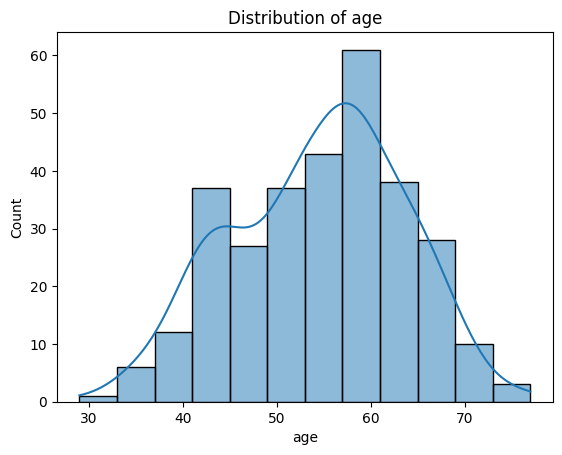

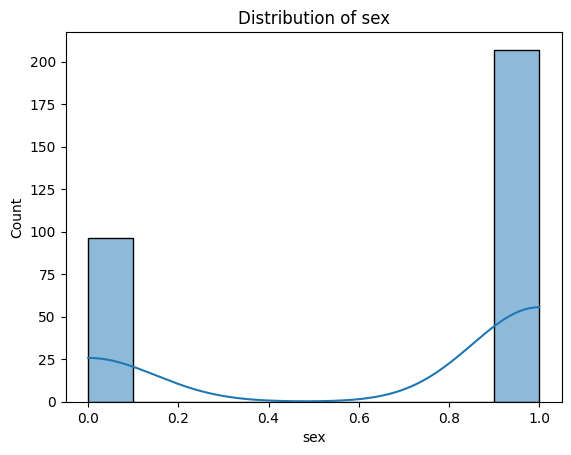

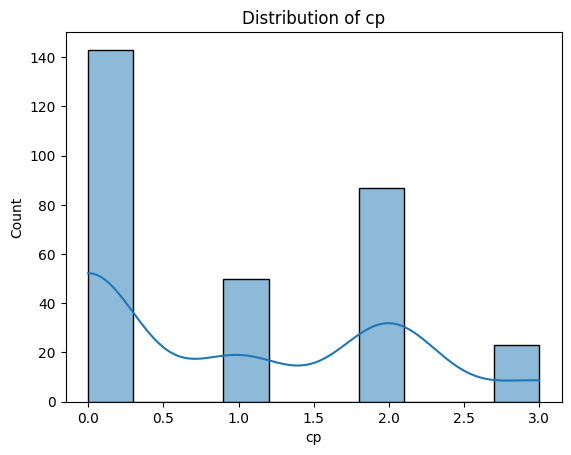

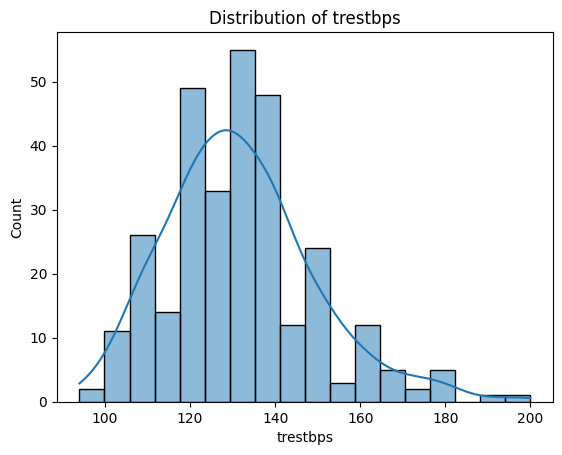

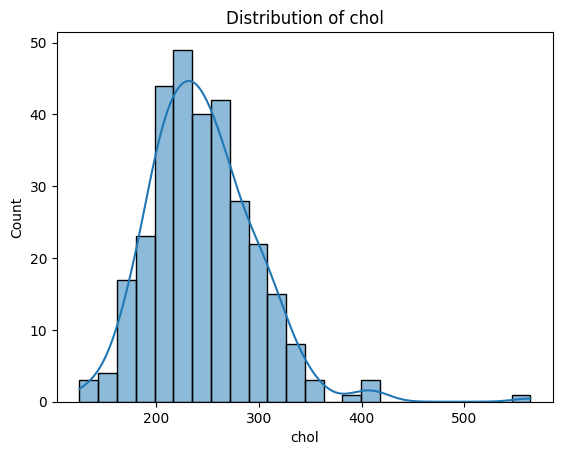

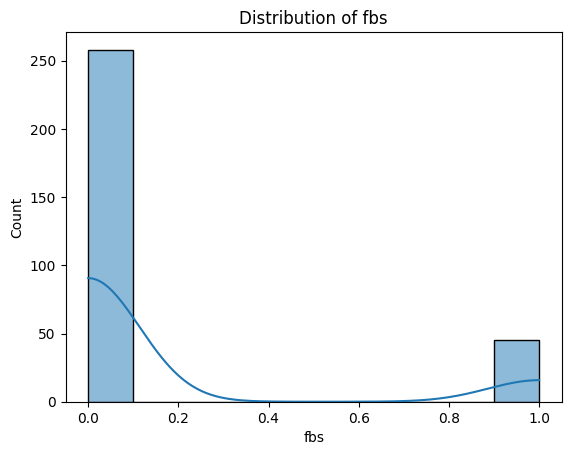

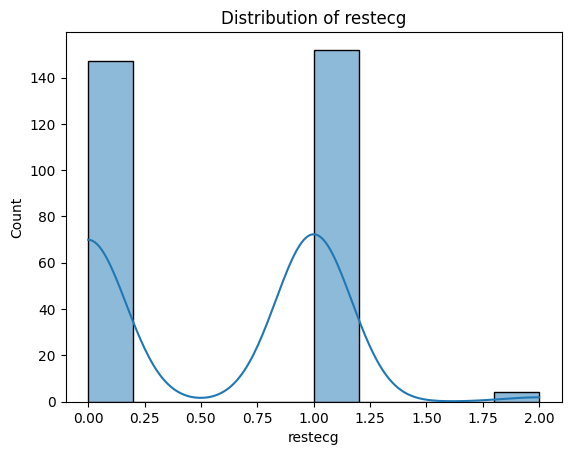

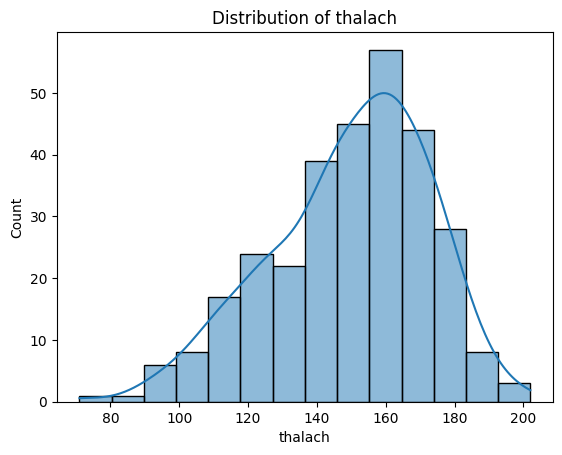

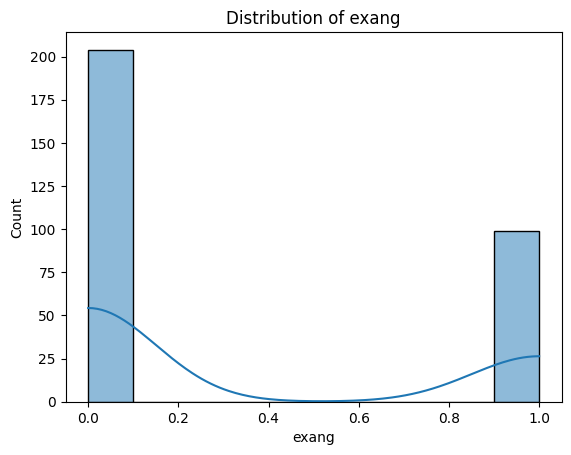

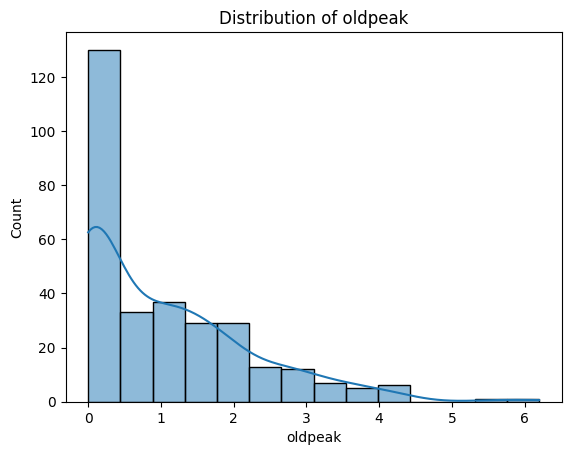

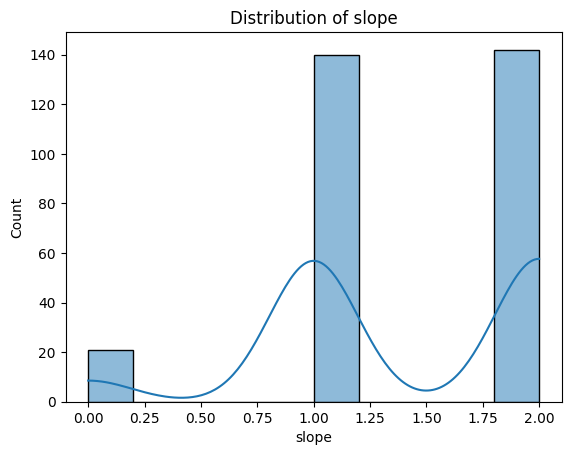

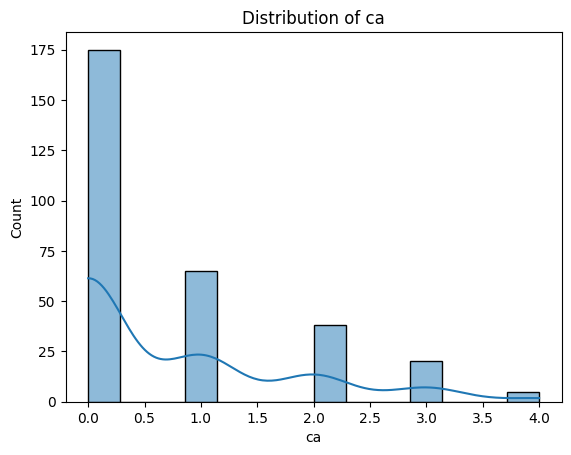

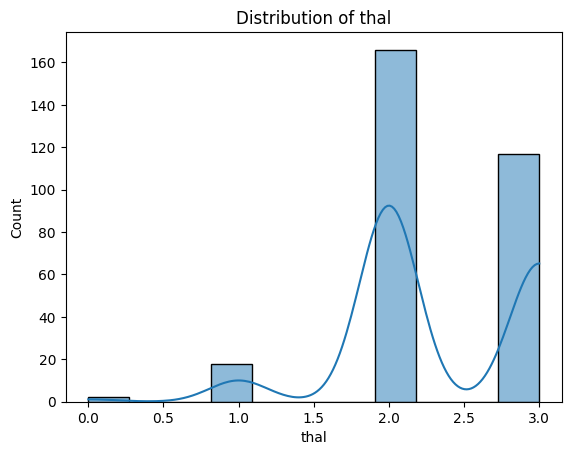

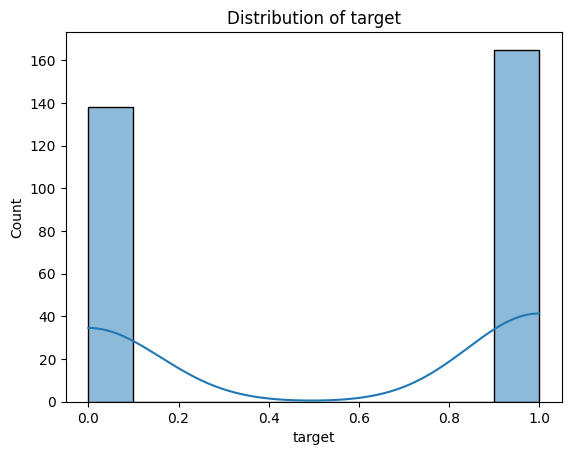

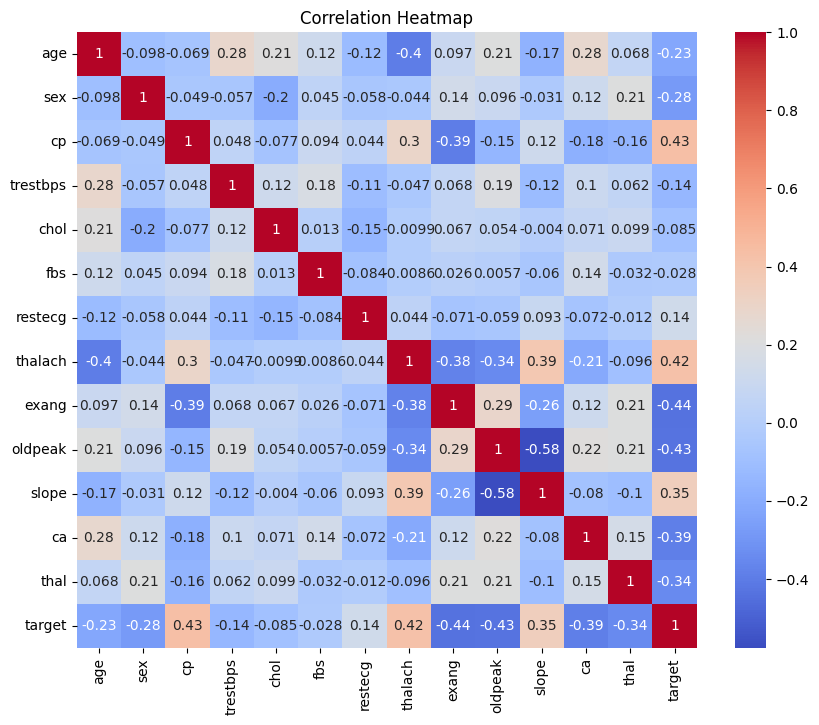


Data after Preprocessing:
         age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873       1  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922       1  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922       1  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922       1  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922       1  
Classification Model Performance:
Accuracy: 0.8525
Classification Report:
              p

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Function to load data
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data Loaded Successfully: {df.shape[0]} rows and {df.shape[1]} columns")
        print("Preview of the Data:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Function to preprocess data
def preprocess_data(df, target_column):
    # Separate features and target column
    features = df.drop(columns=[target_column])
    target = df[target_column]  # Keep target column unchanged

    # Select numerical and categorical columns
    num_cols = features.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = features.select_dtypes(include=['object', 'category']).columns

    # Only impute columns with missing values
    for col in num_cols:
        if features[col].isnull().sum() > 0:
            features[col] = SimpleImputer(strategy='mean').fit_transform(features[[col]])

    # Encode categorical variables, if any
    for col in cat_cols:
        features[col] = LabelEncoder().fit_transform(features[col])

    # Apply scaling to numeric features with StandardScaler
    features[num_cols] = StandardScaler().fit_transform(features[num_cols])

    # Combine processed features and the target column
    df_processed = pd.concat([features, target], axis=1)

    print("\nData after Preprocessing:\n", df_processed.head())
    return df_processed

# Function for exploratory data analysis (EDA)
def perform_eda(df_original):
    print("Performing Exploratory Data Analysis (EDA)...")

    # Plot distributions of numerical features
    num_cols = df_original.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure()
        sns.histplot(df_original[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Plot counts of categorical features
    cat_cols = df_original.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        plt.figure()
        sns.countplot(x=col, data=df_original)
        plt.title(f'Count Plot of {col}')
        plt.show()

    # Correlation heatmap for numerical columns
    if len(num_cols) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_original[num_cols].corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()

# Function to determine problem type and train model
def train_model(df, target_column):
    # Determine if the target is continuous (regression) or has exactly two unique values (binary classification)
    if pd.api.types.is_numeric_dtype(df[target_column]) and df[target_column].nunique() > 2:
        problem_type = 'regression'
    elif df[target_column].nunique() == 2:
        problem_type = 'classification'
    else:
        raise ValueError("Target column should either have continuous values for regression or exactly two unique values for binary classification.")

    # Split data into features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model based on problem type
    if problem_type == 'classification':
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("Classification Model Performance:")
        print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
        print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    else:
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("Regression Model Performance:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.4f}")
        print(f"R-Squared: {r2_score(y_test, predictions):.4f}")

    return model, problem_type

# Function to generate predictions on new data
def make_predictions(model, df, problem_type):
    if problem_type == 'classification':
        predictions = model.predict(df)
    elif problem_type == 'regression':
        predictions = model.predict(df)
    return predictions

# Function to prompt user for input values and make a prediction
def user_input_prediction(df, model, problem_type):
    # Collect user input for each feature
    input_data = {}
    for col in df.columns:
        if col != target_column:
            value = float(input(f"Enter value for {col}: "))
            input_data[col] = [value]

    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)
    predictions = make_predictions(model, input_df, problem_type)
    print(f"Predicted Output: {predictions[0]}")

# Function to run the entire pipeline
def run_pipeline(file_path, target_column):
    df_original = load_data(file_path)
    if df_original is not None:
        # Use original data for EDA
        perform_eda(df_original)

        # Preprocess the data for model training
        df = preprocess_data(df_original, target_column)
        model, problem_type = train_model(df, target_column)
        print("\nModel training completed.")

        # Prompt user for input values to make a prediction
        user_input_prediction(df, model, problem_type)
    else:
        print("Pipeline aborted due to data loading error.")

# Run the pipeline with your CSV file and target column name
file_path = '/content/heart.csv'  # Replace with your CSV file path
target_column = 'target'  # Replace with your target column name
run_pipeline(file_path, target_column)
